In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/ML/bottle-updated.csv')

dataset

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.500,33.4400
1,1,8,10.460,33.4400
2,2,10,10.460,33.4370
3,3,19,10.450,33.4200
4,4,20,10.450,33.4210
...,...,...,...,...
864858,864858,0,18.744,33.4083
864859,864859,2,18.744,33.4083
864860,864860,5,18.692,33.4150
864861,864861,10,18.161,33.4062


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  864863 non-null  int64  
 1   Depthm      864863 non-null  int64  
 2   T_degC      853900 non-null  float64
 3   Salnty      817509 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 26.4 MB


In [ ]:
dataset.replace('?', np.nan, inplace=True)

In [ ]:
print(dataset.isnull().sum().sort_values())

Unnamed: 0        0
Depthm            0
T_degC        10963
Salnty        47354
dtype: int64


In [ ]:
T_mean = dataset['T_degC'].astype(float).mean(axis=0)
S_mean = dataset['Salnty'].astype(float).mean(axis=0)

In [ ]:
dataset['T_degC'].replace(np.nan, T_mean, inplace=True)
dataset['Salnty'].replace(np.nan, S_mean, inplace=True)


dataset.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [ ]:
dataset.isnull().sum().sort_values()

Unnamed: 0    0
Depthm        0
T_degC        0
Salnty        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4689d666d8>,
      dtype=object)

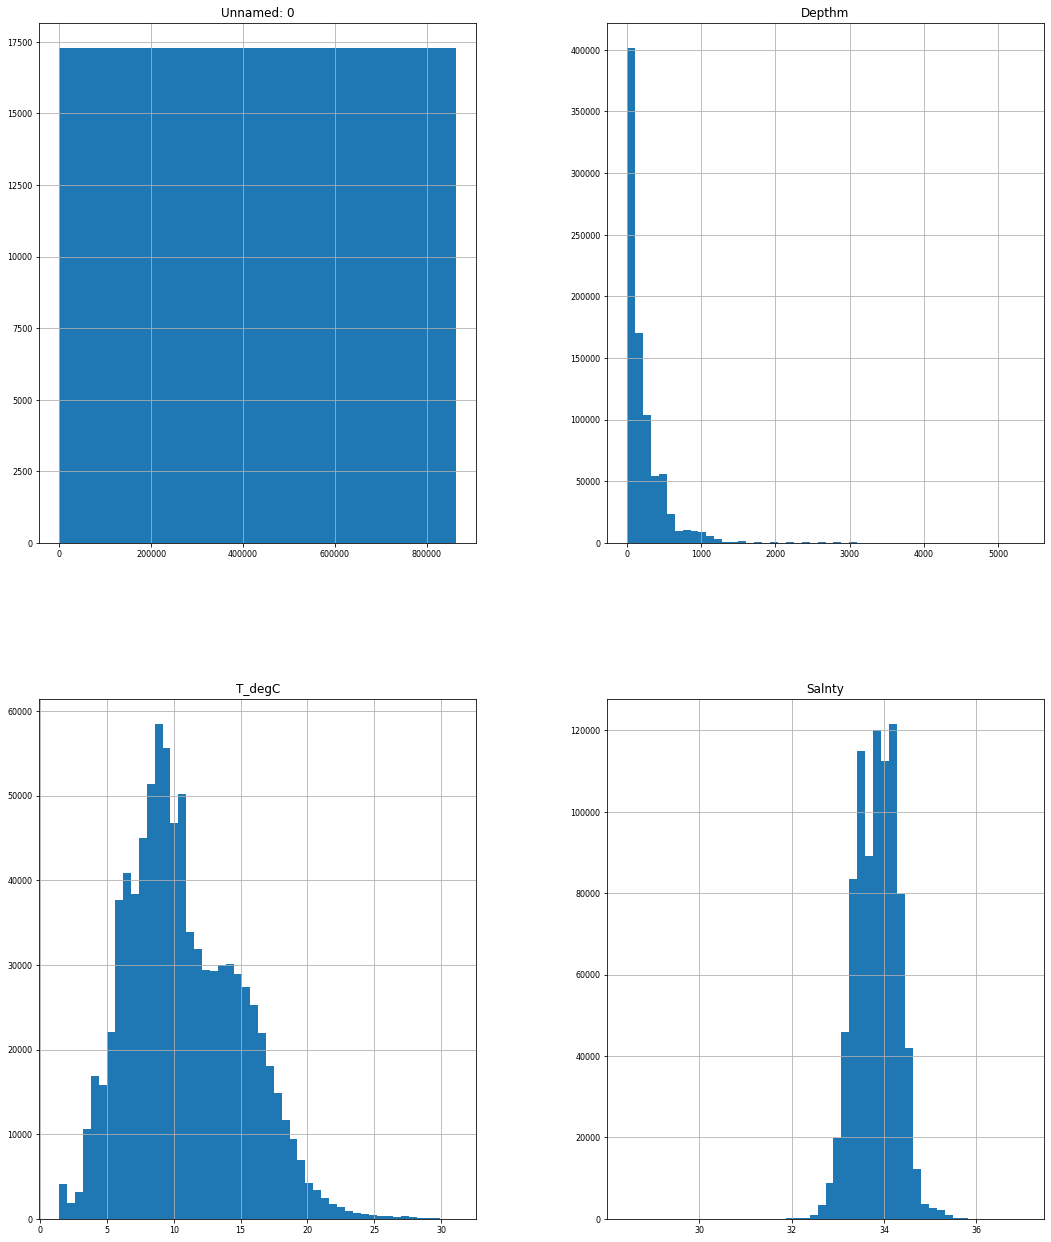

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
corr = dataset.corr()

corr

,Depthm,T_degC,Salnty
Depthm,1.000000,-0.678628,0.543326
T_degC,-0.678628,1.000000,-0.489967
Salnty,0.543326,-0.489967,1.000000


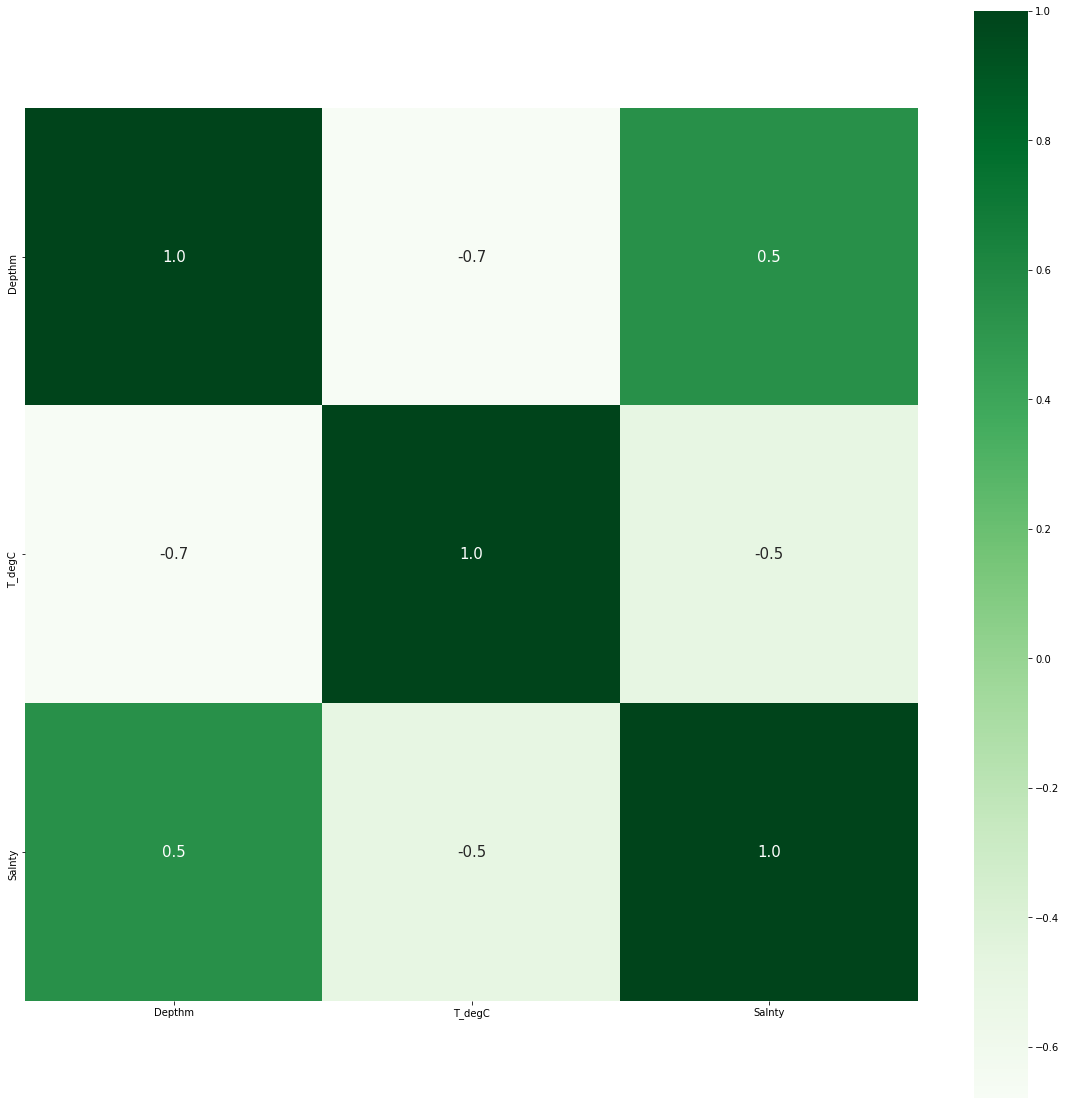

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Linear Regression

### Feature Engineering

In [ ]:
label = dataset['Salnty']
feature = dataset.drop(['Salnty'], axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

feature = scaler.fit_transform(feature.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.25, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.6832035786398614
MAE (Mean Absolute Error) 0.5854716355968662
r^2 score 0.3185370006447811
RMSE (Root Mean Squared Error 0.8265612975695519


### Deep Learning

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
81081/81081 [==============================] - 84s 1ms/step - loss: 0.4119 - val_loss: 0.3957
Epoch 2/50
81081/81081 [==============================] - 85s 1ms/step - loss: 0.3884 - val_loss: 0.3903
Epoch 3/50
81081/81081 [==============================] - 84s 1ms/step - loss: 0.3860 - val_loss: 0.3878
Epoch 4/50
81081/81081 [==============================] - 86s 1ms/step - loss: 0.3753 - val_loss: 0.3633
Epoch 5/50
81081/81081 [==============================] - 87s 1ms/step - loss: 0.3584 - val_loss: 0.3629
Epoch 6/50
81081/81081 [==============================] - 85s 1ms/step - loss: 0.3575 - val_loss: 0.3600
Epoch 7/50
81081/81081 [==============================] - 87s 1ms/step - loss: 0.3574 - val_loss: 0.3592
Epoch 8/50
81081/81081 [==============================] - 90s 1ms/step - loss: 0.3572 - val_loss: 0.3604
Epoch 9/50
81081/81081 [==============================] - 89s 1ms/step - loss: 0.3571 - val_loss: 0.3609
Epoch 10/50
81081/81081 [==============================

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.3547727267307706
MAE (Mean Absolute Error) 0.4085570006086511
r^2 score 0.6461311181526725
RMSE (Root Mean Squared Error 0.5956280103644981


## Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
81081/81081 [==============================] - 106s 1ms/step - loss: 0.3703 - val_loss: 0.3578
Epoch 2/50
81081/81081 [==============================] - 99s 1ms/step - loss: 0.3529 - val_loss: 0.3541
Epoch 3/50
81081/81081 [==============================] - 99s 1ms/step - loss: 0.3513 - val_loss: 0.3552
Epoch 4/50
81081/81081 [==============================] - 101s 1ms/step - loss: 0.3508 - val_loss: 0.3526
Epoch 5/50
81081/81081 [==============================] - 100s 1ms/step - loss: 0.3488 - val_loss: 0.3531
Epoch 6/50
81081/81081 [==============================] - 98s 1ms/step - loss: 0.3472 - val_loss: 0.3509
Epoch 7/50
81081/81081 [==============================] - 98s 1ms/step - loss: 0.3462 - val_loss: 0.3512
Epoch 8/50
81081/81081 [==============================] - 98s 1ms/step - loss: 0.3453 - val_loss: 0.3469
Epoch 9/50
81081/81081 [==============================] - 101s 1ms/step - loss: 0.3449 - val_loss: 0.3530
Epoch 10/50
81081/81081 [==========================

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.34900415094948584
MAE (Mean Absolute Error) 0.4020449382823292
r^2 score 0.6518849974894119
RMSE (Root Mean Squared Error 0.5907657327143186


### Wider model

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.4035 - val_loss: 0.3911
Epoch 2/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.3781 - val_loss: 0.3728
Epoch 3/100
81081/81081 [==============================] - 94s 1ms/step - loss: 0.3588 - val_loss: 0.3585
Epoch 4/100
81081/81081 [==============================] - 94s 1ms/step - loss: 0.3534 - val_loss: 0.3547
Epoch 5/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.3507 - val_loss: 0.3517
Epoch 6/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.3496 - val_loss: 0.3574
Epoch 7/100
81081/81081 [==============================] - 92s 1ms/step - loss: 0.3493 - val_loss: 0.3513
Epoch 8/100
81081/81081 [==============================] - 89s 1ms/step - loss: 0.3489 - val_loss: 0.3561
Epoch 9/100
81081/81081 [==============================] - 89s 1ms/step - loss: 0.3486 - val_loss: 0.3543
Epoch 10/100
81081/81081 [====================

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.35199699528034095
MAE (Mean Absolute Error) 0.3960775998095218
r^2 score 0.648899777947137
RMSE (Root Mean Squared Error 0.5932933467352731


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,0.403482,0.391140,0
1,0.378135,0.372806,1
2,0.358822,0.358490,2
3,0.353447,0.354742,3
4,0.350713,0.351746,4
...,...,...,...
95,0.347059,0.350905,95
96,0.347113,0.349686,96
97,0.347124,0.349417,97
98,0.347217,0.349805,98


In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
88,0.347289,0.348590,88
70,0.347134,0.348772,70
75,0.347266,0.348829,75
53,0.347313,0.348881,53
89,0.347147,0.348883,89
...,...,...,...
46,0.347158,0.359604,46
25,0.347339,0.362697,25
59,0.347197,0.362703,59
1,0.378135,0.372806,1


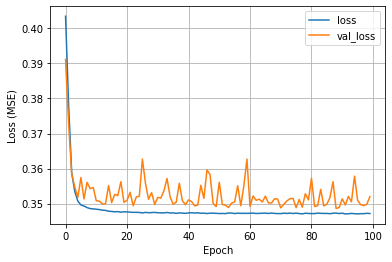

In [ ]:
plot_loss(history) # epoch vs loss graph

In [ ]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
81081/81081 [==============================] - 95s 1ms/step - loss: 0.3965 - val_loss: 0.3874
Epoch 2/100
81081/81081 [==============================] - 94s 1ms/step - loss: 0.3808 - val_loss: 0.3703
Epoch 3/100
81081/81081 [==============================] - 97s 1ms/step - loss: 0.3804 - val_loss: 0.3758
Epoch 4/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.3769 - val_loss: 0.3736
Epoch 5/100
81081/81081 [==============================] - 95s 1ms/step - loss: 0.3766 - val_loss: 0.4490
Epoch 6/100
81081/81081 [==============================] - 92s 1ms/step - loss: 0.3778 - val_loss: 0.3748
Epoch 7/100
81081/81081 [==============================] - 91s 1ms/step - loss: 0.3780 - val_loss: 0.4025
Epoch 8/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.3771 - val_loss: 0.3699
Epoch 9/100
81081/81081 [==============================] - 92s 1ms/step - loss: 0.3762 - val_loss: 0.4002
Epoch 10/100
81081/81081 [====================

In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
93,0.349954,0.348240,93
89,0.349989,0.348347,89
98,0.349902,0.348436,98
81,0.350299,0.349114,81
95,0.349945,0.349214,95
...,...,...,...
8,0.376215,0.400230,8
6,0.378015,0.402493,6
44,0.376450,0.406999,44
4,0.376599,0.448972,4


In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.3950 - val_loss: 0.3869
Epoch 2/100
81081/81081 [==============================] - 95s 1ms/step - loss: 0.3804 - val_loss: 0.3852
Epoch 3/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.3673 - val_loss: 0.3637
Epoch 4/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.3612 - val_loss: 0.3598
Epoch 5/100
81081/81081 [==============================] - 92s 1ms/step - loss: 0.3582 - val_loss: 0.3600
Epoch 6/100
81081/81081 [==============================] - 96s 1ms/step - loss: 0.3574 - val_loss: 0.3650
Epoch 7/100
81081/81081 [==============================] - 95s 1ms/step - loss: 0.3581 - val_loss: 0.3687
Epoch 8/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.3582 - val_loss: 0.3578
Epoch 9/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.3580 - val_loss: 0.3562
Epoch 10/100
81081/81081 [====================

In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

NameError: ignored

# Assignments

Lakukan regresi menggunakan MLP dengan dataset **Auto**, **Auto-MPG** dan **Bottle**! Gunakan 2 arsitektur MLP yang mirip seperti diatas beserta linear regression dan simpulkan hasil yang terbaik!

## Catatan:

1. Gunakan ratio training:testing set sebesar 80:20 untuk dataset **Auto & Auto-MPG**, sedangkan untuk dataset **Bottle** gunakan ratio 75:25. Selain itu, gunakan random_state=10 apabila dibutuhkan.

2. Untuk dataset **Auto**, gunakan kolom-kolom ini saja (sisanya di-drop):
  - wheel-base 
  - length 
  - width 
  - height 
  - bore
  - stroke
  - compression-ratio
  - peak-rpm
  - price

3. Untuk dataset **Bottle** lakukan regresi terhadap attribute **Salinity**.